**Algerian Forest Fires Dataset Project EDA Part**

In [268]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [269]:
df = pd.read_csv('/content/Algerian_forest_fires_dataset.csv')

df.head(3)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Insights -  This dataset has all object columns and it has data type mismatch

In [271]:
num_col = df.drop('Classes', axis=1).columns


In [272]:
for col in num_col:
  df[col] = pd.to_numeric(df[col], errors = 'coerce')

df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          244 non-null    float64       
 1   month        244 non-null    float64       
 2   year         244 non-null    float64       
 3   Temperature  244 non-null    float64       
 4    RH          244 non-null    float64       
 5    Ws          244 non-null    float64       
 6   Rain         244 non-null    float64       
 7   FFMC         244 non-null    float64       
 8   DMC          244 non-null    float64       
 9   DC           243 non-null    float64       
 10  ISI          244 non-null    float64       
 11  BUI          244 non-null    float64       
 12  FWI          243 non-null    float64       
 13  Classes      244 non-null    object        
 14  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(13), object(1)
memory usage

Insights - It has 247 rows and 14 columns

In [274]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,date
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000,244.000000,243.000000,244
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.430864,4.774180,16.664754,7.035391,2012-07-31 12:00:00
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,2012-06-01 00:00:00
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,12.350000,1.400000,6.000000,0.700000,2012-07-01 00:00:00
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,2012-07-31 12:00:00
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,69.100000,7.300000,22.525000,11.450000,2012-08-31 00:00:00
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,2012-09-30 00:00:00
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.665606,4.175318,14.204824,7.440568,NaN


In [275]:
df.isna().sum()

,0
day,3
month,3
year,3
Temperature,3
RH,3
Ws,3
Rain,3
FFMC,3
DMC,3
DC,4


In [276]:
missing_index = df[df.isna().any(axis=1)].index

df.iloc[missing_index]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Classes,NaT
168,14.0,7.0,2012.0,37.0,37.0,18.0,0.2,88.9,12.9,NaN,12.5,10.4,NaN,NaN,2012-07-14


Insights - There are missing data

In [277]:
num_col

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [278]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

itr_impute = IterativeImputer(max_iter = 10, random_state = 42)

df[num_col] = itr_impute.fit_transform(df[num_col])



In [279]:
df.isna().sum()

,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0
DC,0


In [280]:
df.iloc[missing_index]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
122,15.754098,7.5,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.257004,4.77418,16.664754,7.066278,NaN,NaT
123,15.754098,7.5,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.257004,4.77418,16.664754,7.066278,NaN,NaT
124,15.754098,7.5,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.257004,4.77418,16.664754,7.066278,Classes,NaT
168,14.000000,7.0,2012.0,37.000000,37.000000,18.000000,0.200000,88.900000,12.900000,7.008962,12.50000,10.400000,14.571842,NaN,2012-07-14


In [281]:
# Dropping NA values

df = df.dropna().reset_index(drop=True)


In [282]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,2012-09-26
239,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,2012-09-27
240,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2012-09-28
241,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2012-09-29


In [283]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date'],
      dtype='object')

In [284]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date'],
      dtype='object')

In [285]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
day,243.0,15.761317,1.0,8.0,16.0,23.0,31.0,8.842552
month,243.0,7.502058,6.0,7.0,8.0,8.0,9.0,1.114793
year,243.0,2012.0,2012.0,2012.0,2012.0,2012.0,2012.0,0.0
Temperature,243.0,32.152263,22.0,30.0,32.0,35.0,42.0,3.628039
RH,243.0,62.041152,21.0,52.5,63.0,73.5,90.0,14.82816
Ws,243.0,15.493827,6.0,14.0,15.0,17.0,29.0,2.811385
Rain,243.0,0.762963,0.0,0.0,0.0,0.5,16.8,2.003207
FFMC,243.0,77.842387,28.6,71.85,83.3,88.3,96.0,14.349641
DMC,243.0,14.680658,0.7,5.8,11.3,20.8,65.9,12.39304
DC,243.0,49.430864,6.9,12.35,33.1,69.1,220.4,47.665606


In [286]:
df.drop(['day', 'month', 'year'], axis=1, inplace=True)



In [287]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02


In [288]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Insights - Mismatch in classes columns category

In [289]:
df.Classes =  df.Classes.str.strip()

In [290]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,2012-06-01
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,2012-06-02
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,2012-06-03
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,2012-06-04
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,2012-06-05


In [291]:
df.Classes.value_counts()

,count
Classes,
fire,137
not fire,106


In [292]:
df.loc[:121, 'Region'] = 'Bejaia'          # rows 0–121
df.loc[122:, 'Region'] = 'Sidi-Bel Abbes'  # rows 122–end


In [293]:
from sklearn.preprocessing import LabelEncoder

l_enc = LabelEncoder()
df['Region'] = l_enc.fit_transform(df['Region'])

In [294]:
df.to_csv('Fire Forest Cleaned.csv', index=False)

<br>

### **Exploratory Data Analysis (EDA)**

In [295]:
df1 = df.copy()

In [296]:
import numpy as np

df1['Classes']= np.where(df1['Classes'] == 'not fire',0,1)

In [297]:
df1.head(1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,date,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,2012-06-01,0


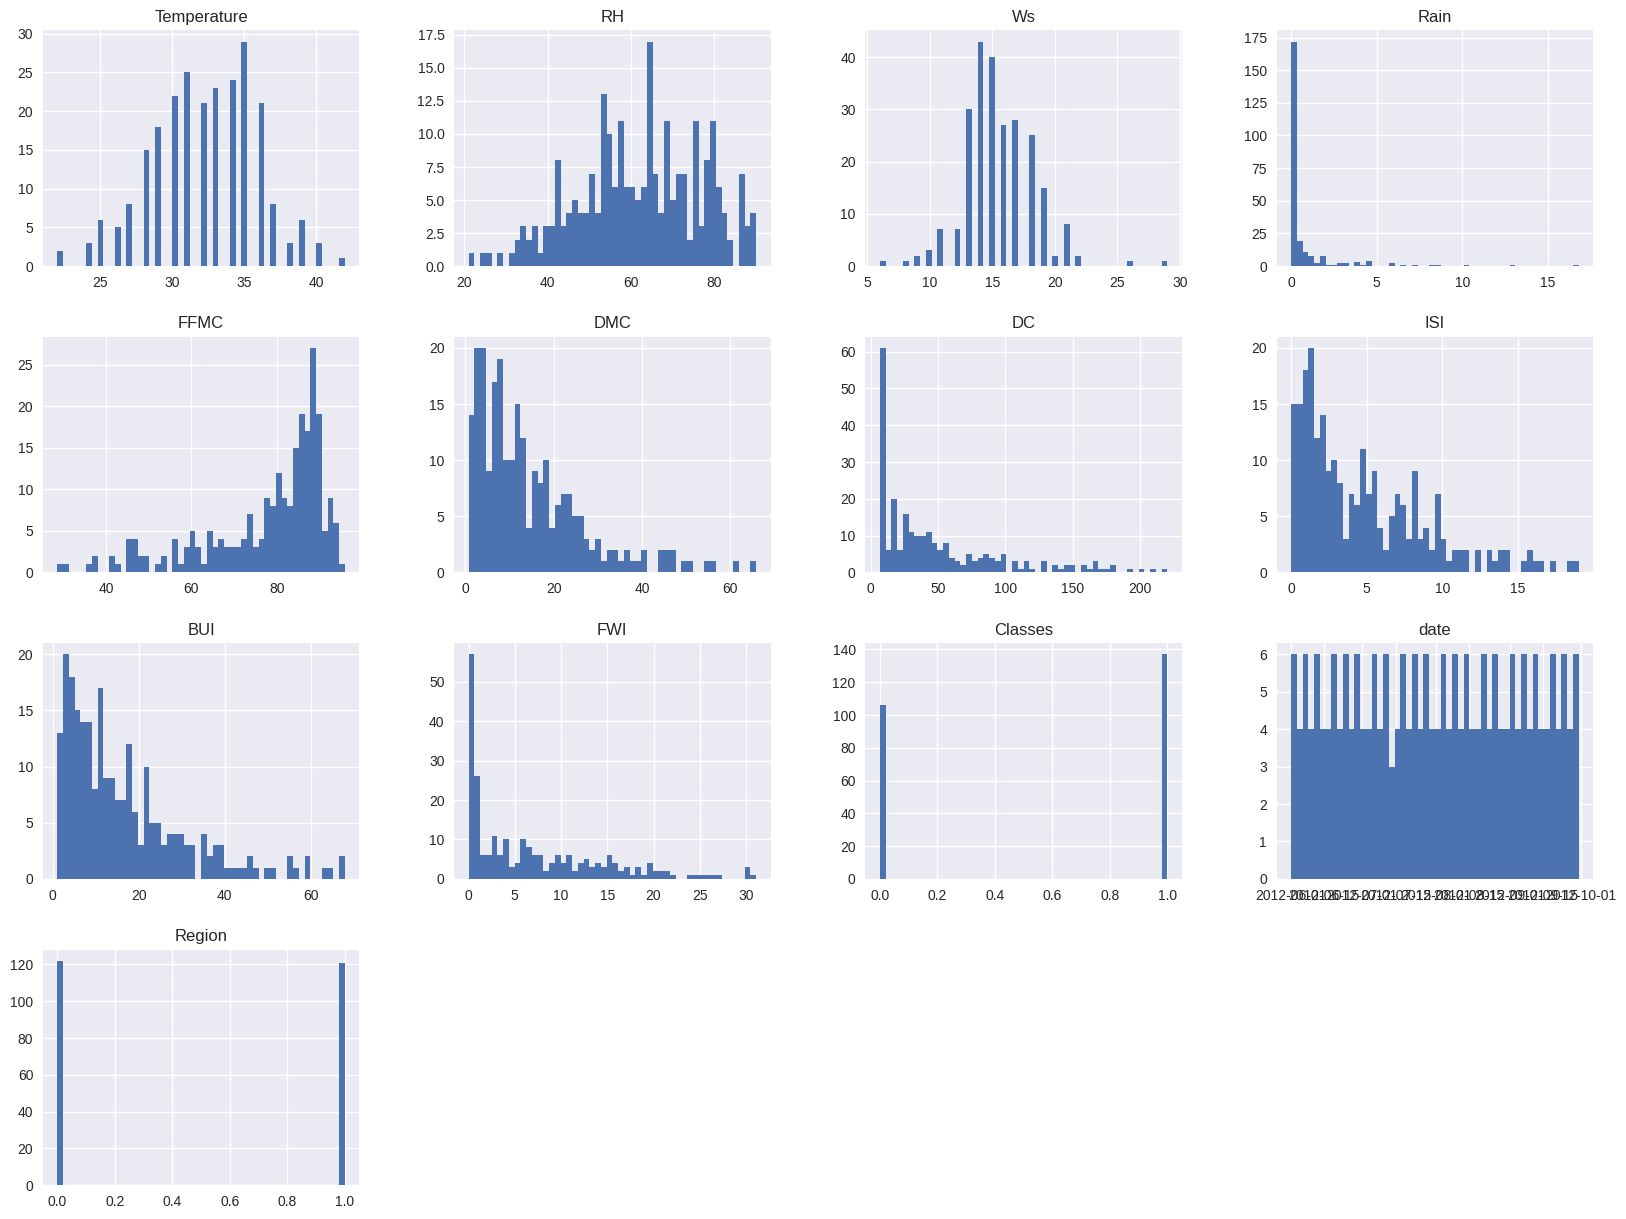

In [299]:
# PLot density plot for all features
plt.style.use('seaborn-v0_8')
df1.hist(bins=50, figsize=(20,15), ec = 'b')
plt.show()

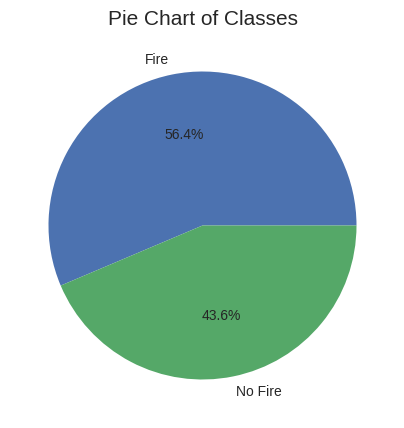

In [310]:
# Percentage for PieChart
percentage = df.Classes.value_counts(normalize=True)*100
percentage

classlabels = ['Fire', 'No Fire']

plt.figure(figsize=(5,5))
plt.pie(percentage,labels = classlabels,autopct='%1.1f%%')
plt.title ("Pie Chart of Classes", fontsize = 15)
plt.show()

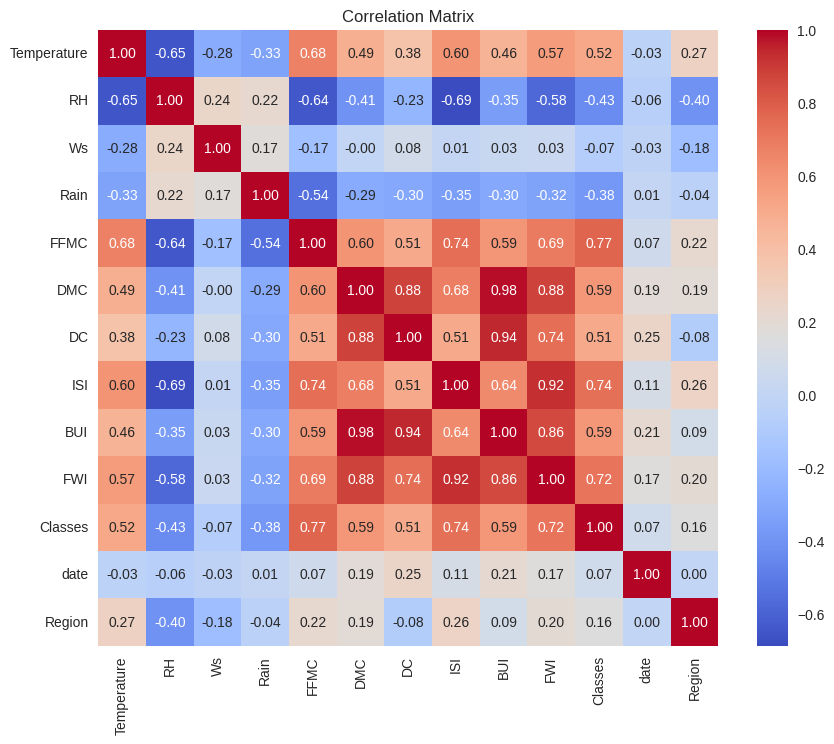

In [314]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [315]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numeric features
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]

# Create a dataframe for VIF values
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


       Feature         VIF
0  Temperature   97.658881
1           RH   30.626211
2           Ws   34.762862
3         Rain    1.652117
4         FFMC  105.119288
5          DMC  182.267139
6           DC   51.197446
7          ISI   52.266821
8          BUI  402.844539
9          FWI   76.318272


In [323]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  243 non-null    float64       
 1   RH           243 non-null    float64       
 2   Ws           243 non-null    float64       
 3   Rain         243 non-null    float64       
 4   FFMC         243 non-null    float64       
 5   DMC          243 non-null    float64       
 6   DC           243 non-null    float64       
 7   ISI          243 non-null    float64       
 8   BUI          243 non-null    float64       
 9   FWI          243 non-null    float64       
 10  Classes      243 non-null    int64         
 11  date         243 non-null    datetime64[ns]
 12  Region       243 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 24.8 KB


In [328]:
months = df1['date'].dt.month_name()
months.unique()

array(['June', 'July', 'August', 'September'], dtype=object)

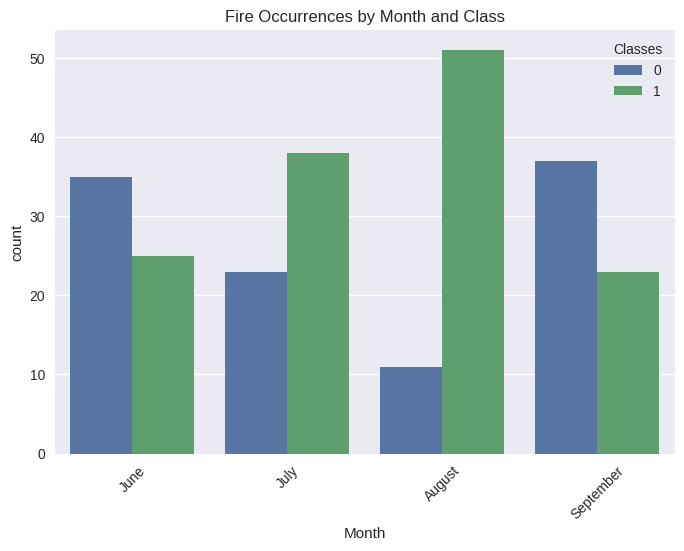

In [334]:
df1['Month'] = df1['date'].dt.month_name()

sns.countplot(data=df1, x='Month', hue='Classes')
plt.xticks(rotation=45)
plt.title('Fire Occurrences by Month and Class')
plt.show()
